#### Project Assignment: Phase 3 - Data Analysis and Visualization

#### Author: Vidya Prabhu

#### Overview
##### This assignment involves extracting, cleaning, analyzing, and visualizing data using SQLite, NumPy, Pandas, and Matplotlib. The process begins with retrieving relevant data from an SQLite database and loading it into a Pandas DataFrame for further exploration.

##### Data cleaning includes identifying and handling missing or incorrect values using appropriate Pandas methods. This may involve filling missing values with statistical measures like mean or median, correcting data formats, and ensuring numerical columns are in the correct type. Once cleaned, the data is saved as a CSV file while maintaining version control.

##### For analysis and visualization, patterns and relationships in the dataset are explored to answer the questions outlined in the project plan. Basic statistics are calculated using Pandas or NumPy, and at least three different visualizations are created to present insights. These plots are generated and displayed in Jupyter Notebook, ensuring a structured presentation of findings.

#### 1. Extract data from SQLite and Load the Data into a Pandas DataFrame

In [231]:
# Import statements
import sqlite3
import pandas as pd
import seaborn as sns

In [232]:
#Connectng to sqllite database
conn = sqlite3.connect('ElectricVehiclesData.sqlite')

# Load the data into a Pandas DataFrame and displaying some of the data on the screen
query = "SELECT * FROM ElectricVehicles;"  # Replace with your actual table name
vehicles_df = pd.read_sql_query(query, conn)

print(vehicles_df.head()) # displaying 5 records

          VIN    County      City State PostalCode  ModelYear    Make  \
0  2T3YL4DV0E      King  Bellevue    WA      98005       2014  TOYOTA   
1  5YJ3E1EB6K      King   Bothell    WA      98011       2019   TESLA   
2  5UX43EU02S  Thurston   Olympia    WA      98502       2025     BMW   
3  JTMAB3FV5R  Thurston   Olympia    WA      98513       2024  TOYOTA   
4  5YJYGDEE8M    Yakima     Selah    WA      98942       2021   TESLA   

        Model                             VehicleType  \
0        RAV4          Battery Electric Vehicle (BEV)   
1     MODEL 3          Battery Electric Vehicle (BEV)   
2          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
3  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4     MODEL Y          Battery Electric Vehicle (BEV)   

                                    CAFV_Eligibility  ElectricRange  BaseMSRP  \
0            Clean Alternative Fuel Vehicle Eligible            103         0   
1            Clean Alternative Fuel Vehicle Eligible    

#### 2. Data Cleaning

In [234]:
#Checking for missing values
print("\nMissing Values Count:")
print(vehicles_df.isnull().sum())


Missing Values Count:
VIN                       0
County                    0
City                      0
State                     0
PostalCode                0
ModelYear                 0
Make                      0
Model                     0
VehicleType               0
CAFV_Eligibility          0
ElectricRange             0
BaseMSRP                  0
LegislativeDistrict       0
DOLVehicleID              0
VehicleLocation           0
ElectricUtility           0
CensusTract               0
Counties                  3
CongressionalDistricts    0
LegislativeBoundary       0
dtype: int64


###### As Counties column is having null values, this needs to be handled by filling with mode value (Most Frequent Value)

In [236]:
# Handling missing values in 'Counties' column
vehicles_df['Counties'] = vehicles_df['Counties'].fillna(vehicles_df['Counties'].mode()[0])

In [237]:
# Verifying after handling missing values
print("\nMissing Values After Handling:")
print(vehicles_df.isnull().sum())


Missing Values After Handling:
VIN                       0
County                    0
City                      0
State                     0
PostalCode                0
ModelYear                 0
Make                      0
Model                     0
VehicleType               0
CAFV_Eligibility          0
ElectricRange             0
BaseMSRP                  0
LegislativeDistrict       0
DOLVehicleID              0
VehicleLocation           0
ElectricUtility           0
CensusTract               0
Counties                  0
CongressionalDistricts    0
LegislativeBoundary       0
dtype: int64


###### Now the data has no null values

In [239]:
#printing values to see the 10 records and work on bad data 
print(vehicles_df.head(10))

          VIN     County        City State PostalCode  ModelYear    Make  \
0  2T3YL4DV0E       King    Bellevue    WA      98005       2014  TOYOTA   
1  5YJ3E1EB6K       King     Bothell    WA      98011       2019   TESLA   
2  5UX43EU02S   Thurston     Olympia    WA      98502       2025     BMW   
3  JTMAB3FV5R   Thurston     Olympia    WA      98513       2024  TOYOTA   
4  5YJYGDEE8M     Yakima       Selah    WA      98942       2021   TESLA   
5  3C3CFFGE1G   Thurston     Olympia    WA      98501       2016    FIAT   
6  5YJ3E1EA4J  Snohomish  Marysville    WA      98271       2018   TESLA   
7  5YJ3E1EA3K       King     Seattle    WA      98102       2019   TESLA   
8  1N4AZ0CP5E   Thurston        Yelm    WA      98597       2014  NISSAN   
9  5YJSA1S25F   Thurston        Yelm    WA      98597       2015   TESLA   

        Model                             VehicleType  \
0        RAV4          Battery Electric Vehicle (BEV)   
1     MODEL 3          Battery Electric Vehicle (

###### BaseMRP is 0 for most columns so I will be replacing it with mean value

In [241]:
mean_msrp = vehicles_df['BaseMSRP'].mean()
vehicles_df['BaseMSRP'] = vehicles_df['BaseMSRP'].replace(0, mean_msrp)

In [242]:
print(vehicles_df['BaseMSRP'])

0        1591.102286
1        1591.102286
2        1591.102286
3        1591.102286
4        1591.102286
            ...     
4150     1591.102286
4151     1591.102286
4152    52900.000000
4153     1591.102286
4154     1591.102286
Name: BaseMSRP, Length: 4155, dtype: float64


In [243]:
# checking the data type to see if there are any wrong data format
print("\nData Types Checking Before Cleaning:")
print(vehicles_df.dtypes)


Data Types Checking Before Cleaning:
VIN                        object
County                     object
City                       object
State                      object
PostalCode                 object
ModelYear                   int64
Make                       object
Model                      object
VehicleType                object
CAFV_Eligibility           object
ElectricRange               int64
BaseMSRP                  float64
LegislativeDistrict        object
DOLVehicleID                int64
VehicleLocation            object
ElectricUtility            object
CensusTract                object
Counties                   object
CongressionalDistricts     object
LegislativeBoundary        object
dtype: object


###### LegislativeDistrict, CensusTract, CongressionalDistricts, LegislativeBoundary and Counties needs to be numeric columns.

In [245]:
numeric_cols = ['LegislativeDistrict', 'CensusTract', 'CongressionalDistricts','LegislativeBoundary', 'Counties']
for col in numeric_cols:
    vehicles_df[col] = pd.to_numeric(vehicles_df[col], errors='coerce')

In [246]:
#printing data types after conversion/cleaning
print("\nData Types Checking After Cleaning:")
print(vehicles_df.dtypes)


Data Types Checking After Cleaning:
VIN                        object
County                     object
City                       object
State                      object
PostalCode                 object
ModelYear                   int64
Make                       object
Model                      object
VehicleType                object
CAFV_Eligibility           object
ElectricRange               int64
BaseMSRP                  float64
LegislativeDistrict         int64
DOLVehicleID                int64
VehicleLocation            object
ElectricUtility            object
CensusTract                 int64
Counties                    int64
CongressionalDistricts      int64
LegislativeBoundary         int64
dtype: object


###### Data types looks good now

In [248]:
#Printing the model year just to check what is the year range for the entire dataset 
print(vehicles_df['ModelYear'].min(), vehicles_df['ModelYear'].max())

2000 2025


In [249]:
#Saving the cleaned data to a CSV file
vehicles_df.to_csv('Cleaned_ElectricVehiclesData.csv', index=False)

In [250]:
# Closing the database connection
conn.close()

# Final Check: Displaying cleaned data sample
print("\nCleaned Data Sample:")
print(vehicles_df.head())


Cleaned Data Sample:
          VIN    County      City State PostalCode  ModelYear    Make  \
0  2T3YL4DV0E      King  Bellevue    WA      98005       2014  TOYOTA   
1  5YJ3E1EB6K      King   Bothell    WA      98011       2019   TESLA   
2  5UX43EU02S  Thurston   Olympia    WA      98502       2025     BMW   
3  JTMAB3FV5R  Thurston   Olympia    WA      98513       2024  TOYOTA   
4  5YJYGDEE8M    Yakima     Selah    WA      98942       2021   TESLA   

        Model                             VehicleType  \
0        RAV4          Battery Electric Vehicle (BEV)   
1     MODEL 3          Battery Electric Vehicle (BEV)   
2          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
3  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4     MODEL Y          Battery Electric Vehicle (BEV)   

                                    CAFV_Eligibility  ElectricRange  \
0            Clean Alternative Fuel Vehicle Eligible            103   
1            Clean Alternative Fuel Vehicle Eligible  

#### 3. Data Analysis and Visualization

##### 1. What are the most and least common electric vehicle models registered in Washington State in 2024? 

###### Data Analysis

In [254]:
# Filtering for only 2024 models
ev_2024 = vehicles_df[vehicles_df["ModelYear"] == 2024]

# Counting the number of registrations per model
model_counts = ev_2024["Model"].value_counts()

# Most and least common models
most_common = model_counts.idxmax()
least_common = model_counts.idxmin()

#printing the results
print(f"Most Common Model in 2024: {most_common} ({model_counts.max()} registrations)")
print(f"Least Common Model in 2024: {least_common} ({model_counts.min()} registrations)")

Most Common Model in 2024: MODEL Y (44 registrations)
Least Common Model in 2024: PACIFICA (1 registrations)


In [255]:
#Statistics
model_counts.describe()

count    77.000000
mean     11.285714
std       9.987963
min       1.000000
25%       3.000000
50%       8.000000
75%      15.000000
max      44.000000
Name: count, dtype: float64

###### Visualization

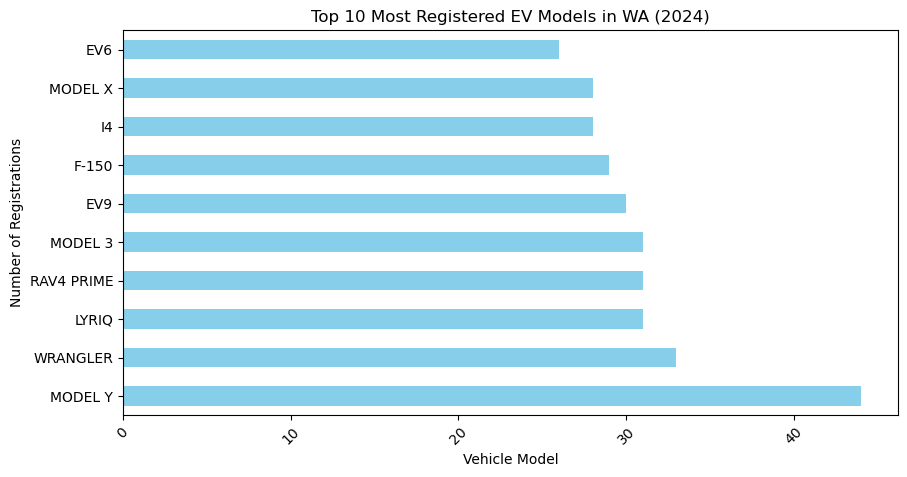

In [257]:
# Visualizing the statistics using horizontal bar chart
import matplotlib.pyplot as plt

# Plotting top 10 most common EV models
model_counts.head(10).plot(kind="barh", color="skyblue", figsize=(10, 5))

plt.title("Top 10 Most Registered EV Models in WA (2024)")
plt.xlabel("Vehicle Model")
plt.ylabel("Number of Registrations")
plt.xticks(rotation=45)
plt.show()

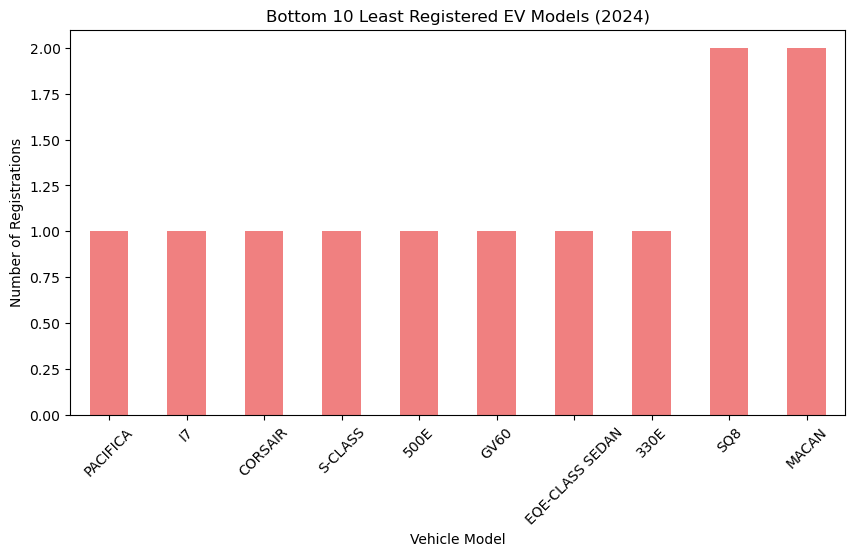

In [258]:
# Sorting bottom 10 models in ascending order before plotting
least_common_models = model_counts.nsmallest(10).sort_values(ascending=True)

# Plotting bottom 10 least common EV models using Bar Chart
least_common_models.tail(10).plot(kind="bar", color="lightcoral", figsize=(10, 5))

plt.title("Bottom 10 Least Registered EV Models (2024)")
plt.xlabel("Vehicle Model")
plt.ylabel("Number of Registrations")
plt.xticks(rotation=45)

plt.show()

##### Conclusion: Most Common Model in 2024 is MODEL Y and least Common Model in 2024 is PACIFICA

##### 2. How does the distribution of electric vehicles vary across different counties in Washington State, and which areas show the highest EV adoption rates?

###### Data Analysis

In [262]:
#Counting the number of EVs per county
county_distribution = vehicles_df["County"].value_counts()
print(county_distribution)

County
King            2836
Clark            459
Kitsap           265
Snohomish        214
Thurston         176
Yakima            57
Cowlitz           33
Jefferson         29
Island            25
Skagit            14
Spokane            9
Stevens            8
Clallam            6
Walla Walla        5
Grant              5
Whitman            4
Chelan             3
Kittitas           2
Douglas            1
Pend Oreille       1
Okanogan           1
Ferry              1
Klickitat          1
Name: count, dtype: int64


In [263]:
#Statistics
county_distribution.describe()

count      23.000000
mean      180.652174
std       589.924079
min         1.000000
25%         2.500000
50%         8.000000
75%        45.000000
max      2836.000000
Name: count, dtype: float64

###### Visualization

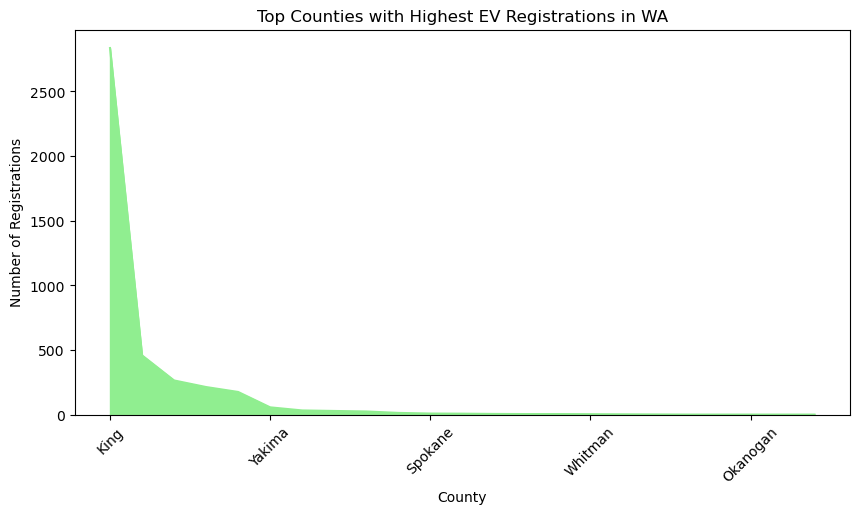

In [265]:
# Visualizing the statistics using Area Chart
# Plotting counties with highest EV registrations
county_distribution.plot(kind="area", color="lightgreen", figsize=(10, 5))

plt.title("Top Counties with Highest EV Registrations in WA")
plt.xlabel("County")
plt.ylabel("Number of Registrations")
plt.xticks(rotation=45)
plt.show()

##### Conclusion: KING county of Washington state has highest EV adoption rates

##### 3. What is the average electric range of registered EVs, and how does it vary across different models?

###### Data Analysis

In [269]:
# Computing average electric range per model and selecting top 10
top_10_avg_range = vehicles_df.groupby("Model")["ElectricRange"].mean().nlargest(10)

# Printing the top 10 models with highest average range
print(top_10_avg_range)

Model
MACAN               298.000000
KONA                258.000000
ROADSTER            220.000000
I-PACE              212.727273
MODEL S             166.646465
BOLT EV             143.368421
MODEL X             124.340206
E-TRON              122.270270
E-TRON SPORTBACK    109.000000
E-GOLF              107.000000
Name: ElectricRange, dtype: float64


In [270]:
#Statistics
top_10_avg_range.describe()

count     10.000000
mean     176.135263
std       67.371801
min      107.000000
25%      122.787754
50%      155.007443
75%      218.181818
max      298.000000
Name: ElectricRange, dtype: float64

###### Visulaization

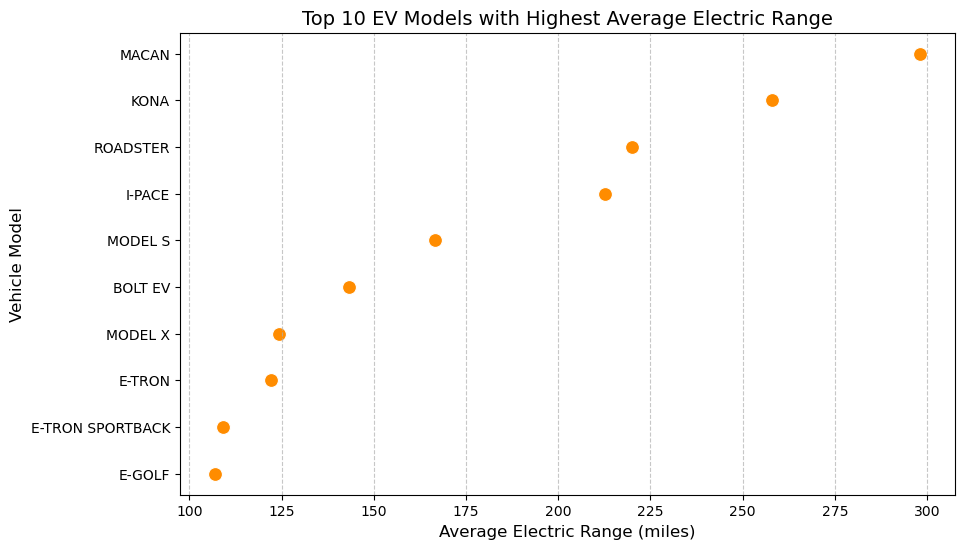

In [272]:
# Visualizing the statistics using scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_10_avg_range.values, y=top_10_avg_range.index, color="darkorange", s=100)

plt.title("Top 10 EV Models with Highest Average Electric Range", fontsize=14)
plt.xlabel("Average Electric Range (miles)", fontsize=12)
plt.ylabel("Vehicle Model", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

##### Conclusion: This data shows that Macan has the highest average range (298 miles), while most models in the top 10 exceed 200 miles of range. However, some widely known EVs, like the Model X, have slightly lower average ranges compared to newer competitors.

##### 4. What is the distribution of model years in the dataset?

###### Data Analysis

In [276]:
# Value count of EV cars purchased across model years
model_year_stats = vehicles_df["ModelYear"].value_counts()

# Print the statistics
print(model_year_stats)

ModelYear
2024    869
2023    858
2022    508
2021    354
2018    229
2020    228
2019    215
2025    213
2017    190
2016    160
2015    109
2014     88
2013     84
2012     35
2011     13
2000      1
2008      1
Name: count, dtype: int64


In [277]:
#Statistics
model_year_stats.describe()

count     17.000000
mean     244.411765
std      267.508191
min        1.000000
25%       84.000000
50%      190.000000
75%      229.000000
max      869.000000
Name: count, dtype: float64

###### Visualization

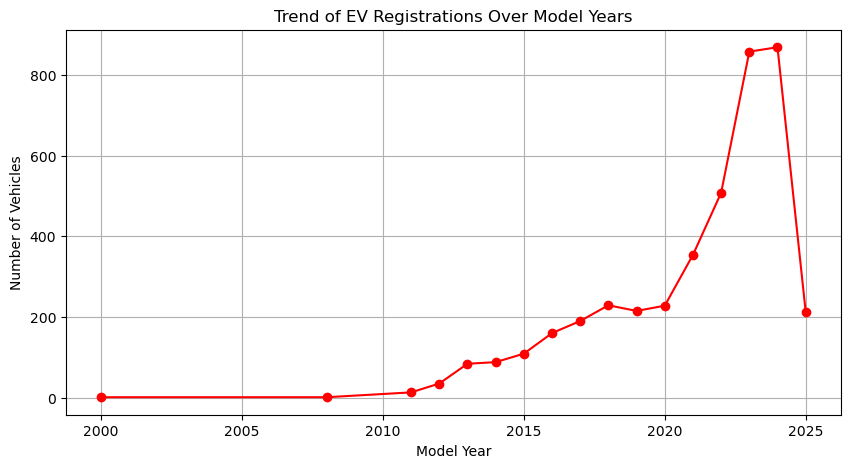

In [279]:
#visulaization in Line chart
plt.figure(figsize=(10, 5))
vehicles_df["ModelYear"].value_counts().sort_index().plot(kind="line", marker="o", color="red", linestyle="-")

plt.title("Trend of EV Registrations Over Model Years")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.show()

##### Conclusion: The majority of registered EVs are from the last 5 years (2020-2025), highlighting rapid adoption and technological advancements in the EV industry